# 1. Introduction
**In this notebook an attempt to analyze and visualize insights of the Twitter account WeRateDogs is attempted. Pieces of data are gathered together, assessed and cleaned before the analysis is performed. Therefore, the notebook is divided in 6 sections:**
- Introduction
- Gather data
- Assess data
- Clean data
- Store the clean dataset 
- Analyze the clean dataset

# 2. Gather data
**The data required, come from 3 different sources. The main dataset (twitter_archived_enhanced.csv) is provided by the project. The image_predictions data that contains predictions of the dog breed is downladed programatically from the url given by the project. Finally, the last piece of data where the retweet count and favorite count are stored are downloaded programmatically via the API keys that was provided by Twitter**


In [33]:
# Import necessarry modules and read file
import numpy as np
import pandas as pd
import requests
import os
import tweepy
import time
import json
import re
import matplotlib.pyplot as plt
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Gather data 2.1
Downlaod image_predictions from the url provided by the project

In [2]:
# Create a folder and download image_predictions file programatically

folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open (os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

## Gather data 2.2
Downlaod data from Twitter API, write and read a json file and load it into a pandas datframe

In [3]:
# Create an API object to use for gathering data

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [4]:
count = 0

# Save each tweet's returned JSON as a new line in a .txt file
with open('fotis_tweet_json.txt', 'w') as outfile:
    # This loop might take some time
    for tweet_id in twitter_archive_enhanced["tweet_id"]: 
        count = count+1
        print(str(count) + ": " + str(tweet_id))
        try:
            data = api.get_status(tweet_id, tweet_mode='extended',wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            print("Done")
            json.dump(data._json, outfile)
            outfile.write('\n')
        except:
            print("Failed")
            pass
        
# Read text file line by line to create dataframe
tweets_data = []
with open('fotis_tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue




1: 892420643555336193
Done
2: 892177421306343426
Done
3: 891815181378084864
Done
4: 891689557279858688
Done
5: 891327558926688256
Done
6: 891087950875897856
Done
7: 890971913173991426
Done
8: 890729181411237888
Done
9: 890609185150312448
Done
10: 890240255349198849
Done
11: 890006608113172480
Done
12: 889880896479866881
Done
13: 889665388333682689
Done
14: 889638837579907072
Done
15: 889531135344209921
Done
16: 889278841981685760
Done
17: 888917238123831296
Done
18: 888804989199671297
Done
19: 888554962724278272
Done
20: 888202515573088257
Failed
21: 888078434458587136
Done
22: 887705289381826560
Done
23: 887517139158093824
Done
24: 887473957103951883
Done
25: 887343217045368832
Done
26: 887101392804085760
Done
27: 886983233522544640
Done
28: 886736880519319552
Done
29: 886680336477933568
Done
30: 886366144734445568
Done
31: 886267009285017600
Done
32: 886258384151887873
Done
33: 886054160059072513
Done
34: 885984800019947520
Done
35: 885528943205470208
Done
36: 885518971528720385
Done

Done
287: 838831947270979586
Done
288: 838561493054533637
Done
289: 838476387338051585
Done
290: 838201503651401729
Done
291: 838150277551247360
Done
292: 838085839343206401
Done
293: 838083903487373313
Done
294: 837820167694528512
Done
295: 837482249356513284
Done
296: 837471256429613056
Done
297: 837366284874571778
Failed
298: 837110210464448512
Done
299: 837012587749474308
Failed
300: 836989968035819520
Done
301: 836753516572119041
Done
302: 836677758902222849
Done
303: 836648853927522308
Done
304: 836397794269200385
Done
305: 836380477523124226
Done
306: 836260088725786625
Done
307: 836001077879255040
Done
308: 835685285446955009
Done
309: 835574547218894849
Done
310: 835536468978302976
Done
311: 835309094223372289
Done
312: 835297930240217089
Done
313: 835264098648616962
Done
314: 835246439529840640
Done
315: 835172783151792128
Done
316: 835152434251116546
Done
317: 834931633769889797
Done
318: 834786237630337024
Done
319: 834574053763584002
Done
320: 834477809192075265
Done
321: 

Done
570: 801958328846974976
Done
571: 801854953262350336
Done
572: 801538201127157760
Done
573: 801285448605831168
Done
574: 801167903437357056
Done
575: 801127390143516673
Done
576: 801115127852503040
Done
577: 800859414831898624
Done
578: 800855607700029440
Done
579: 800751577355128832
Done
580: 800513324630806528
Done
581: 800459316964663297
Done
582: 800443802682937345
Done
583: 800388270626521089
Done
584: 800188575492947969
Done
585: 800141422401830912
Done
586: 800018252395122689
Done
587: 799774291445383169
Done
588: 799757965289017345
Done
589: 799422933579902976
Done
590: 799308762079035393
Done
591: 799297110730567681
Done
592: 799063482566066176
Done
593: 798933969379225600
Done
594: 798925684722855936
Done
595: 798705661114773508
Done
596: 798701998996647937
Done
597: 798697898615730177
Done
598: 798694562394996736
Done
599: 798686750113755136
Done
600: 798682547630837760
Done
601: 798673117451325440
Done
602: 798665375516884993
Done
603: 798644042770751489
Done
604: 7986

Done
853: 765395769549590528
Done
854: 765371061932261376
Done
855: 765222098633691136
Done
856: 764857477905154048
Done
857: 764259802650378240
Done
858: 763956972077010945
Done
859: 763837565564780549
Done
860: 763183847194451968
Done
861: 763167063695355904
Done
862: 763103485927849985
Done
863: 762699858130116608
Done
864: 762471784394268675
Done
865: 762464539388485633
Done
866: 762316489655476224
Done
867: 762035686371364864
Done
868: 761976711479193600
Done
869: 761750502866649088
Done
870: 761745352076779520
Done
871: 761672994376806400
Done
872: 761599872357261312
Done
873: 761371037149827077
Done
874: 761334018830917632
Done
875: 761292947749015552
Done
876: 761227390836215808
Done
877: 761004547850530816
Done
878: 760893934457552897
Done
879: 760656994973933572
Done
880: 760641137271070720
Done
881: 760539183865880579
Done
882: 760521673607086080
Done
883: 760290219849637889
Done
884: 760252756032651264
Done
885: 760190180481531904
Done
886: 760153949710192640
Done
887: 7599

Rate limit reached. Sleeping for: 291


Done
902: 758474966123810816
Done
903: 758467244762497024
Done
904: 758405701903519748
Done
905: 758355060040593408
Done
906: 758099635764359168
Done
907: 758041019896193024
Done
908: 757741869644341248
Done
909: 757729163776290825
Done
910: 757725642876129280
Done
911: 757611664640446465
Done
912: 757597904299253760
Done
913: 757596066325864448
Done
914: 757400162377592832
Done
915: 757393109802180609
Done
916: 757354760399941633
Done
917: 756998049151549440
Done
918: 756939218950160384
Done
919: 756651752796094464
Done
920: 756526248105566208
Done
921: 756303284449767430
Done
922: 756288534030475264
Done
923: 756275833623502848
Done
924: 755955933503782912
Done
925: 755206590534418437
Done
926: 755110668769038337
Done
927: 754874841593970688
Done
928: 754856583969079297
Done
929: 754747087846248448
Done
930: 754482103782404096
Done
931: 754449512966619136
Done
932: 754120377874386944
Done
933: 754011816964026368
Failed
934: 753655901052166144
Done
935: 753420520834629632
Done
936: 75

Done
1179: 719551379208073216
Done
1180: 719367763014393856
Done
1181: 719339463458033665
Done
1182: 719332531645071360
Done
1183: 718971898235854848
Done
1184: 718939241951195136
Done
1185: 718631497683582976
Done
1186: 718613305783398402
Done
1187: 718540630683709445
Done
1188: 718460005985447936
Done
1189: 718454725339934721
Done
1190: 718246886998687744
Done
1191: 718234618122661888
Done
1192: 717841801130979328
Done
1193: 717790033953034240
Done
1194: 717537687239008257
Done
1195: 717428917016076293
Done
1196: 717421804990701568
Done
1197: 717047459982213120
Done
1198: 717009362452090881
Done
1199: 716802964044845056
Done
1200: 716791146589110272
Done
1201: 716730379797970944
Done
1202: 716447146686459905
Done
1203: 716439118184652801
Done
1204: 716285507865542656
Done
1205: 716080869887381504
Done
1206: 715928423106027520
Done
1207: 715758151270801409
Done
1208: 715733265223708672
Done
1209: 715704790270025728
Done
1210: 715696743237730304
Done
1211: 715680795826982913
Done
1212:

Done
1453: 695767669421768709
Done
1454: 695629776980148225
Done
1455: 695446424020918272
Done
1456: 695409464418041856
Done
1457: 695314793360662529
Done
1458: 695095422348574720
Done
1459: 695074328191332352
Done
1460: 695064344191721472
Done
1461: 695051054296211456
Done
1462: 694925794720792577
Done
1463: 694905863685980160
Done
1464: 694669722378485760
Done
1465: 694356675654983680
Done
1466: 694352839993344000
Done
1467: 694342028726001664
Done
1468: 694329668942569472
Done
1469: 694206574471057408
Done
1470: 694183373896572928
Done
1471: 694001791655137281
Done
1472: 693993230313091072
Done
1473: 693942351086120961
Done
1474: 693647888581312512
Done
1475: 693644216740769793
Done
1476: 693642232151285760
Done
1477: 693629975228977152
Done
1478: 693622659251335168
Done
1479: 693590843962331137
Done
1480: 693582294167244802
Done
1481: 693486665285931008
Done
1482: 693280720173801472
Done
1483: 693267061318012928
Done
1484: 693262851218264065
Done
1485: 693231807727280129
Done
1486:

Done
1727: 680055455951884288
Failed
1728: 679877062409191424
Done
1729: 679872969355714560
Done
1730: 679862121895714818
Done
1731: 679854723806179328
Done
1732: 679844490799091713
Done
1733: 679828447187857408
Done
1734: 679777920601223168
Done
1735: 679736210798047232
Done
1736: 679729593985699840
Done
1737: 679722016581222400
Done
1738: 679530280114372609
Done
1739: 679527802031484928
Done
1740: 679511351870550016
Done
1741: 679503373272485890
Done
1742: 679475951516934144
Done
1743: 679462823135686656
Done
1744: 679405845277462528
Done
1745: 679158373988876288
Done
1746: 679148763231985668
Done
1747: 679132435750195208
Done
1748: 679111216690831360
Done
1749: 679062614270468097
Done
1750: 679047485189439488
Done
1751: 679001094530465792
Done
1752: 678991772295516161
Done
1753: 678969228704284672
Done
1754: 678800283649069056
Done
1755: 678798276842360832
Done
1756: 678774928607469569
Done
1757: 678767140346941444
Done
1758: 678764513869611008
Done
1759: 678755239630127104
Done
176

Rate limit reached. Sleeping for: 392


Done
1802: 676957860086095872
Done
1803: 676949632774234114
Done
1804: 676948236477857792
Done
1805: 676946864479084545
Done
1806: 676942428000112642
Done
1807: 676936541936185344
Done
1808: 676916996760600576
Done
1809: 676897532954456065
Done
1810: 676864501615042560
Done
1811: 676821958043033607
Done
1812: 676819651066732545
Done
1813: 676811746707918848
Done
1814: 676776431406465024
Done
1815: 676617503762681856
Done
1816: 676613908052996102
Done
1817: 676606785097199616
Done
1818: 676603393314578432
Done
1819: 676593408224403456
Done
1820: 676590572941893632
Done
1821: 676588346097852417
Done
1822: 676582956622721024
Done
1823: 676575501977128964
Done
1824: 676533798876651520
Done
1825: 676496375194980353
Done
1826: 676470639084101634
Done
1827: 676440007570247681
Done
1828: 676430933382295552
Done
1829: 676263575653122048
Done
1830: 676237365392908289
Done
1831: 676219687039057920
Done
1832: 676215927814406144
Done
1833: 676191832485810177
Done
1834: 676146341966438401
Done
1835:

Done
2076: 670840546554966016
Done
2077: 670838202509447168
Done
2078: 670833812859932673
Done
2079: 670832455012716544
Done
2080: 670826280409919488
Done
2081: 670823764196741120
Done
2082: 670822709593571328
Done
2083: 670815497391357952
Done
2084: 670811965569282048
Done
2085: 670807719151067136
Done
2086: 670804601705242624
Done
2087: 670803562457407488
Done
2088: 670797304698376195
Done
2089: 670792680469889025
Done
2090: 670789397210615808
Done
2091: 670786190031921152
Done
2092: 670783437142401025
Done
2093: 670782429121134593
Done
2094: 670780561024270336
Done
2095: 670778058496974848
Done
2096: 670764103623966721
Done
2097: 670755717859713024
Done
2098: 670733412878163972
Done
2099: 670727704916926465
Done
2100: 670717338665226240
Done
2101: 670704688707301377
Done
2102: 670691627984359425
Done
2103: 670679630144274432
Done
2104: 670676092097810432
Done
2105: 670668383499735048
Done
2106: 670474236058800128
Done
2107: 670468609693655041
Done
2108: 670465786746662913
Done
2109:

Done
2350: 666051853826850816
Done
2351: 666050758794694657
Done
2352: 666049248165822465
Done
2353: 666044226329800704
Done
2354: 666033412701032449
Done
2355: 666029285002620928
Done
2356: 666020888022790149
Done


In [11]:
# Create twitter dataframe from the API provided
df_api = pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 27 columns):
created_at                       2333 non-null object
id                               2333 non-null int64
id_str                           2333 non-null object
full_text                        2333 non-null object
truncated                        2333 non-null bool
display_text_range               2333 non-null object
entities                         2333 non-null object
extended_entities                2061 non-null object
source                           2333 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null object
in_reply_to_screen_name          77 non-null object
user                             2333 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [12]:
# Select subset of dataframe
df_api_new = df_api[['id', 'favorite_count', 'retweet_count']]
df_api_new.head()

,id,favorite_count,retweet_count
0,892420643555336193,36847,7851
1,892177421306343426,31711,5821
2,891815181378084864,23892,3846
3,891689557279858688,40170,8020
4,891327558926688256,38363,8666


In [8]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1783,829011960981237760,https://pbs.twimg.com/media/C4E99ygWcAAQpPs.jpg,2,boxer,0.312221,True,dalmatian,0.244040,True,conch,0.130273,False
791,690690673629138944,https://pbs.twimg.com/media/CZXTgKkWwAA5UZJ.jpg,1,bath_towel,0.194532,False,radiator,0.127776,False,Maltese_dog,0.089625,True
198,669625907762618368,https://pbs.twimg.com/media/CUr9NjgU8AEpf5w.jpg,1,seat_belt,0.874502,False,golden_retriever,0.055408,True,Labrador_retriever,0.026854,True
221,670093938074779648,https://pbs.twimg.com/media/CUym4Y5WsAEiI9_.jpg,1,toy_poodle,0.383346,True,miniature_poodle,0.153678,True,chow,0.138543,True
1665,812503143955202048,https://pbs.twimg.com/media/C0aXTLqXEAADxBi.jpg,2,loupe,0.546856,False,web_site,0.345298,False,bubble,0.010528,False


# 3. Assess data

   ##   3.1 Visual assessment


In [6]:
# Check and observe the twitter_archive_enhanced dataframe
boolean = any(twitter_archive_enhanced['tweet_id'].duplicated())
print(boolean)
twitter_archive_enhanced.sample(10)

False


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2025,671882082306625538,NaN,NaN,2015-12-02 02:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Batdog. He's sleeping now but when he ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671882082...,11,10,Batdog,None,None,None,None
626,795076730285391872,NaN,NaN,2016-11-06 01:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She loves going down slides bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795076730...,11,10,Bailey,None,None,None,None
389,826476773533745153,NaN,NaN,2017-01-31 17:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pilot. He has mastered the synchronize...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826476773...,12,10,Pilot,doggo,None,None,None
2086,670803562457407488,NaN,NaN,2015-11-29 03:16:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I would do radical things in the name of Dog G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670803562...,10,10,None,None,None,None,None
79,877556246731214848,NaN,NaN,2017-06-21 15:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's both pupset and fired pup...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877556246...,12,10,Penny,None,None,None,None


In [9]:
# Check and observe the image_predictions dataframe
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1870,844704788403113984,https://pbs.twimg.com/media/C7j-hkSW0AIxCZC.jpg,1,Labrador_retriever,0.980213,True,golden_retriever,0.007012,True,beagle,0.003147,True
265,670803562457407488,https://pbs.twimg.com/media/CU8sSAvXIAAB1Py.jpg,1,basenji,0.344101,True,Ibizan_hound,0.210282,True,toy_terrier,0.196279,True
1099,720415127506415616,https://pbs.twimg.com/media/Cf9tuHUWsAAHSrV.jpg,1,Rottweiler,0.990312,True,black-and-tan_coonhound,0.002495,True,American_black_bear,0.001733,False
524,676603393314578432,https://pbs.twimg.com/media/CWPHMqKVAAAE78E.jpg,1,whippet,0.877021,True,Great_Dane,0.034182,True,boxer,0.028404,True
1011,709449600415961088,https://pbs.twimg.com/media/Cdh4pgAW0AEKJ_a.jpg,2,Maltese_dog,0.780187,True,Dandie_Dinmont,0.074429,True,Norfolk_terrier,0.033776,True


In [13]:
# Check and observe the dataframe from Twitter API
df_api_new.sample(10)

,id,favorite_count,retweet_count
1826,675781562965868544,1621,465
1261,708711088997666817,2577,730
1217,712092745624633345,2971,899
149,861383897657036800,35169,10309
1880,674638615994089473,1664,571
478,813187593374461952,20572,4544
1189,715360349751484417,5536,1589
714,781524693396357120,21454,5766
2095,670420569653809152,611,306
1524,689283819090870273,3328,1121


   ##   3.2 Programatic assessment

In [16]:
# Get info of the twitter_archive_enhanced dataframe
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
# Get descriptive statistics of the twitter_archive_enhanced dataframe
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
# Check what values are there for the numerator
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
# Get info of the image_predictions dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
# Get descriptive statistics of the imageC_predictions dataframe
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
# Check values of the first breed prediction of the dogs
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
hare                    1
lorikeet                1
ice_lolly               1
minibus                 1
scorpion                1
Name: p1, Length: 378, dtype: int64

In [21]:
# Get info of the Twiter API dataframe
df_api_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
id                2333 non-null int64
favorite_count    2333 non-null int64
retweet_count     2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [22]:
# Get descriptive statistics of the Twiter API dataframe
df_api_new.describe()

,id,favorite_count,retweet_count
count,2.333000e+03,2333.000000,2333.000000
mean,7.419279e+17,7685.359194,2765.157308
std,6.820607e+16,11928.801406,4679.580181
min,6.660209e+17,0.000000,1.000000
25%,6.782786e+17,1334.000000,555.000000
50%,7.184547e+17,3342.000000,1296.000000
75%,7.986654e+17,9441.000000,3216.000000
max,8.924206e+17,159166.000000,79403.000000


   ##   3.3 Issue List

### Quality: 
 1. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers/strings instead of float.
 2. timestamp should be datetime instead of object (string)
 3. tweet_id is an intiger but should be a string as no calculation will be performed involving the tweet_id
 4. In Dog name column, the names that miss are not NaN's missing values, but written the string "None" or "a" at some cases
 5. Rating denomitor should always be 10 but that's not always the case. I.e, in twitter id "684222868335505415", the numerator is 121 and dominator 110. 
 6. The source column format is not well illustrated. The HTML tags are still on.
 7. In p1,p2, and p3 columns data entires are not consistent as far as capitalization is considered. Some names are bigin with capital letters while others are all lowercased.
 8. The tweet_id column should be named same in all the DataFrames and it's datatype should be same in all the tables



 
### Tidiness:
 1. There are 4 columns that refer to the same variable (dog stage). They should be combined to one.
 2. Join the 3 tables in one after renameing "id" column to "tweet_id" to match with the rest

# 4. Clean data
**Before cleaning the data, copies of the original dataframes are made.**

In [34]:
# Create copies of df's to work on
df_main = twitter_archive_enhanced.copy()
df_image = image_predictions.copy()
df_twiter_api = df_api_new.copy()


### 4.1.1
**Quality Issue #1:in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers/strings instead of float. Drop those columns as they will not be needed for the analysis**


### 4.1.2
**Code to drop the columns**

In [35]:
# Drop unnecessarry columns 
df_main = df_main.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis =1)



### 4.1.3
**Test issue was cleaned**

In [36]:
df_main.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### 4.2.1
**Quality Issue #2 and #3:Timestamp column should be datetime dtype instead of object/string. tweet_id is an intiger but should be a string as no calculation will be performed involving the tweet_id. Convert them**

### 4.2.2
**Code to convert them**

In [39]:
# Convert column timestamp from object to timestamp
df_main['timestamp'] = pd.to_datetime(df_main['timestamp'])

# Convert tweet_id from int to str in main df
df_main['tweet_id'] = df_main['tweet_id'].astype(str)

# Convert tweet_id from int to str in image df
df_image['tweet_id'] = df_image['tweet_id'].astype(str)

# Convert tweet_id from int to str in twiter api df
df_twiter_api['id'] = df_twiter_api['id'].astype(str)

### 4.2.3
**Check that issues are fixed**

In [40]:
# Check that columns dtype has changed
print(df_main.info())
print(df_image.info())
print(df_twiter_api.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns, UTC]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 221.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2

### 4.3.1
**Quality Issue #4: In Dog name column, the names that miss are not NaN's missing values, but written the string "None" or "a" at some cases**

### 4.3.2
**Code to fix issue**

In [44]:
# Correcting dog names
df_main.name = df_main.name.str.replace('^[a-z]+','None')


### 4.3.3
**Check that issues are fixed**

In [45]:
# Verify that change was applied
df_main.name.value_counts()

None       854
Charlie     12
Oliver      11
Cooper      11
Lucy        11
          ... 
Siba         1
Tommy        1
Rumpole      1
Boots        1
Petrick      1
Name: name, Length: 932, dtype: int64

### 4.4.1
**Quality Issue #5: Rating denomitor should always be 10 but that's not always the case. I.e, in twitter id "684222868335505415", the numerator is 121 and dominator 110.**

### 4.4.2
**Code to fix issue**

In [47]:
# Correcting numerator and denomenator values
x = df_main.text.str.extract('((?:\d+\.)?\d+)(/)([1][0])', expand=True)
# Correcting numerator and denomenator values
x = df_main.text.str.extract('((?:\d+\.)?\d+)(/)([1][0])', expand=True)
df_main['rating_numerator_new'] = x[0].astype(str).astype(float)
df_main['rating_denominator_new'] = x[2].astype(str).astype(float)


### 4.4.3
**Check if issue is fixed**

In [48]:
# Check that denomenator values are fixed to 10
df_main.rating_denominator_new.value_counts()

10.0    2340
Name: rating_denominator_new, dtype: int64

### 4.5.1
**Quality Issue #6: The source column format is not well illustrated. The HTML tags are still on. Remove them**

### 4.5.2
**Code to fix issue**

In [51]:
# Remove HTML tags from source column
from bs4 import BeautifulSoup
new_source = []
for source in df_main.source[:].values:
    cleantext = BeautifulSoup(source, "lxml").text
    new_source.append(cleantext)
    
# Substitute the 'source' column with the new text without the HTML tags
df_main.source = np.asarray(new_source)

### 4.5.3
**Check if issue is fixed**

In [52]:
# Verify that the change has been applied
df_main.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2356, dtype: object

### 4.6.1
**Quality Issue #7: In p1,p2, and p3 columns data entires are not consistent as far as capitalization is considered. Some names are bigin with capital letters while others are all lowercased. Make everything lowercased**

### 4.6.2
**Code to fix issue**

In [53]:
#Lowercase columns with inconsistent letter capitalization
df_image['p1'] = df_image['p1'].str.lower()
df_image['p2'] = df_image['p2'].str.lower()
df_image['p3'] = df_image['p3'].str.lower()

### 4.6.3
**Check if issue is fixed**

In [54]:
# Verify that change has been applied
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### 4.7.1
**Quality Issue #8: The tweet_id column should be named same in all the DataFrames and it's datatype should be same in all the tables**

### 4.7.2
**Code to fix issue**

In [55]:
df_twiter_api = df_twiter_api.rename(columns={'id':'tweet_id'})

### 4.7.3
**Check if issue is fixed**

In [57]:
df_twiter_api.head(1)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36847,7851


### 4.8.1
**tidiness Issue #1:There are 4 columns that refer to the same variable (dog stage). They should be combined to one.**

### 4.8.2
**Code to fix issue**

In [58]:
# Create one column for the type of dog instead of four
# Extract the text from the columns into the new dog_type colunn
df_main['dog_type'] = df_main['text'].str.extract('(doggo|floofer|pupper|puppo)')
# drop previous 4 columns
df_main = df_main.drop(['doggo','floofer','pupper','puppo'],axis=1)

### 4.8.3
**Check if issue is fixed**

In [59]:
df_main.sample(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_numerator_new,rating_denominator_new,dog_type
1159,724046343203856385,2016-04-24 01:24:35+00:00,Twitter for iPhone,This is Sarge. Not even he knows what his tong...,https://twitter.com/dog_rates/status/724046343...,10,10,Sarge,10.0,10.0,NaN
1393,700029284593901568,2016-02-17 18:49:22+00:00,Twitter for iPhone,This is Coops. His ship is taking on water. So...,https://twitter.com/dog_rates/status/700029284...,10,10,Coops,10.0,10.0,NaN
1955,673636718965334016,2015-12-06 22:54:44+00:00,Twitter for iPhone,This is a Lofted Aphrodisiac Terrier named Kip...,https://twitter.com/dog_rates/status/673636718...,10,10,None,10.0,10.0,NaN
685,788150585577050112,2016-10-17 22:51:57+00:00,Twitter for iPhone,This is Leo. He's a golden chow. Rather h*ckin...,https://twitter.com/dog_rates/status/788150585...,13,10,Leo,13.0,10.0,NaN
1493,692752401762250755,2016-01-28 16:53:37+00:00,Twitter for iPhone,"""Hello yes could I get one pupper to go please...",https://twitter.com/dog_rates/status/692752401...,13,10,None,13.0,10.0,pupper
1708,680798457301471234,2015-12-26 17:12:55+00:00,Twitter for iPhone,Say hello to Moofasa. He must be a powerful do...,https://twitter.com/dog_rates/status/680798457...,6,10,Moofasa,6.0,10.0,NaN
633,793845145112371200,2016-11-02 16:00:06+00:00,Twitter for iPhone,This is Clark. He was just caught wearing pant...,https://twitter.com/dog_rates/status/793845145...,13,10,Clark,13.0,10.0,NaN
1183,718939241951195136,2016-04-09 23:10:47+00:00,Twitter for iPhone,This is Otis. Everybody look at Otis. 12/10 wo...,https://twitter.com/dog_rates/status/718939241...,12,10,Otis,12.0,10.0,NaN
792,773670353721753600,2016-09-07 23:52:41+00:00,Twitter for iPhone,This is Shakespeare. He appears to be maximum ...,https://twitter.com/dog_rates/status/773670353...,10,10,Shakespeare,10.0,10.0,NaN
2265,667534815156183040,2015-11-20 02:47:56+00:00,Twitter Web Client,"This is Frank (pronounced ""Fronq""). Too many b...",https://twitter.com/dog_rates/status/667534815...,8,10,Frank,8.0,10.0,NaN


### 4.9.1
**Tidiness Issue #2:Join the 3 tables in one after renameing "id" column to "tweet_id" to match with the rest**

### 4.9.2
**Code to fix issue**

In [61]:
# Merge the image_predictions table with the favorite_count and retweet_count columns
df_image_enhcanced = pd.merge(df_image, df_twiter_api,
                            on='tweet_id', how='inner')

# Merge all available data in one master dataframe
df_master = pd.merge(df_main, df_image_enhcanced,on='tweet_id', how='inner')

### 4.9.3
**Check if issue is fixed**

In [62]:
# Verify that merging is succesfull
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 24 columns):
tweet_id                  2061 non-null object
timestamp                 2061 non-null datetime64[ns, UTC]
source                    2061 non-null object
text                      2061 non-null object
expanded_urls             2061 non-null object
rating_numerator          2061 non-null int64
rating_denominator        2061 non-null int64
name                      2061 non-null object
rating_numerator_new      2048 non-null float64
rating_denominator_new    2048 non-null float64
dog_type                  335 non-null object
jpg_url                   2061 non-null object
img_num                   2061 non-null int64
p1                        2061 non-null object
p1_conf                   2061 non-null float64
p1_dog                    2061 non-null bool
p2                        2061 non-null object
p2_conf                   2061 non-null float64
p2_dog                    2061 non-n

# 5. Store the cleaned dataset


In [63]:
# Store dataframe to a csv file
df_master.to_csv('twitter_archive_master.csv')

# 6. Analyze the cleaned dataset


In [64]:
# Get insight on the amount of dogs for each dog_stage
df_master.dog_type.value_counts()

pupper     231
doggo       73
puppo       28
floofer      3
Name: dog_type, dtype: int64

In [65]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_numerator_new,rating_denominator_new,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,13.0,10.0,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,36847,7851
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13.0,10.0,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,31711,5821
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,12.0,10.0,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,23892,3846
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,13.0,10.0,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,40170,8020
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,12.0,10.0,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,38363,8666


In [66]:
# Create column with dog_breed based on the predictions
df_master['dog_breed'] = 'None'

for i, row in df_master.iterrows():

    if row.p1_dog:
         df_master.at[i,'dog_breed'] = row.p1
    elif row.p2_dog and row.rating_numerator >= 10:
        df_master.at[i,'dog_breed'] = row.p2
    elif row.p3_dog and row.rating_numerator >= 10:
        df_master.at[i,'dog_breed'] = row.p3
    else:
        df_master.at[i,'dog_breed'] = 'None'


In [67]:
# Get insight on the amount of each breed
df_master.dog_breed.value_counts()

None                    380
golden_retriever        171
labrador_retriever      110
pembroke                 94
chihuahua                87
                       ... 
japanese_spaniel          1
bouvier_des_flandres      1
clumber                   1
irish_wolfhound           1
silky_terrier             1
Name: dog_breed, Length: 114, dtype: int64

In [68]:
# Get insight on the average rating that each "dog stage" has received. Then we can check if this rating goes along with 
# average favorite tweet count.
dog_stage_rating = df_master.groupby('dog_type').rating_numerator_new.mean()
dog_stage_rating

dog_type
doggo      11.625000
floofer    12.666667
pupper     10.618933
puppo      12.107143
Name: rating_numerator_new, dtype: float64

In [69]:
# Get dataframe with average favorite count for each dog stage
dog_stage = df_master.groupby('dog_type').favorite_count.mean()
dog_stage

dog_type
doggo      16213.931507
floofer    21373.666667
pupper      6423.913420
puppo      21236.464286
Name: favorite_count, dtype: float64

In [70]:
# Create labels for the plot
labels = dog_stage.index
labels

Index(['doggo', 'floofer', 'pupper', 'puppo'], dtype='object', name='dog_type')

Text(0, 0.5, 'Nr. of favorites')

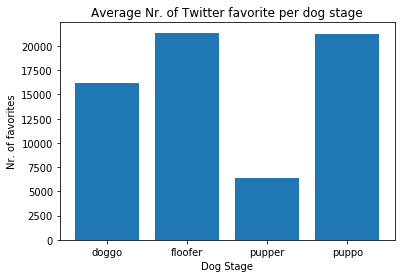

In [71]:
# Create visualization of the average nr. of twiter favorites for each dog stage
plt.bar([1, 2, 3, 4], [dog_stage[0],dog_stage[1],dog_stage[2],dog_stage[3]], tick_label=labels);
plt.title('Average Nr. of Twitter favorite per dog stage')
plt.xlabel('Dog Stage')
plt.ylabel('Nr. of favorites')